<a href="https://colab.research.google.com/github/JFMitu/JFMitu/blob/main/Copy_of_Inceptionv3_jannat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch torchvision timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.0 MB/s eta 0:00:00


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Define paths for the dataIset
data_dir = '/content/drive/MyDrive/Custom Data BRRI'
batch_size = 32

In [ ]:
import torch
from torchvision import datasets, transforms

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Load the entire dataset from Google Drive
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

In [ ]:

# Calculate the sizes of train, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

In [ ]:
print("Total Size:", train_size+test_size+val_size)
print("Train Size:", train_size)
print("Test Size:", test_size)
print("validation Size:", test_size)

Total Size: 1600
Train Size: 1120
Test Size: 240
validation Size: 240


In [ ]:
# Create data loaders for train, validation, and test sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
num_classes = len(dataset.classes)
print("Number of classes: ", num_classes)

Number of classes:  8


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model
inception_model = InceptionV3(weights='imagenet')

# Print model summary
inception_model.summary()


96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
from timm.models.inception_v3 import inception_v3
class inception_v3(nn.Module):
    def __init__(self, num_classes):
        super(inception_v3, self).__init__()
        self.inception_v3 = models.inception_v3(pretrained=True)
        in_features = self.inception_v3.fc.in_features
        self.inception_v3.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.inception_v3(x)

In [ ]:
import timm
import torch.nn as nn
import torch.optim as optim

# Define the model architecture (timm's Inception V3)
model = timm.create_model('inception_v3', pretrained=True)

num_classes = len(dataset.classes)

model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adjust the final fully connected layer

# Move the model to a suitable device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

InceptionV3(
  (Conv2d_1a_3x3): ConvNormAct(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNormAct2d(
      32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
  )
  (Conv2d_2a_3x3): ConvNormAct(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
  )
  (Conv2d_2b_3x3): ConvNormAct(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
  )
  (Pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): ConvNormAct(
    (conv): Conv2d(64, 80, kernel_size

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Lists to store training loss and accuracy for each epoch
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

In [ ]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)


    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    validation_loss = val_loss / len(val_loader)
    validation_accuracy = correct_val / total_val
    val_losses.append(validation_loss)
    val_accuracies.append(validation_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}% - "
          f"Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy*100:.2f}%")

Epoch [1/20] - Train Loss: 0.9418, Train Accuracy: 70.62% - Validation Loss: 1.9498, Validation Accuracy: 42.92%
Epoch [2/20] - Train Loss: 0.4861, Train Accuracy: 84.29% - Validation Loss: 0.9534, Validation Accuracy: 81.25%
Epoch [3/20] - Train Loss: 0.4075, Train Accuracy: 87.14% - Validation Loss: 0.4099, Validation Accuracy: 86.67%
Epoch [4/20] - Train Loss: 0.2692, Train Accuracy: 92.41% - Validation Loss: 0.7808, Validation Accuracy: 74.58%
Epoch [5/20] - Train Loss: 0.3239, Train Accuracy: 88.66% - Validation Loss: 0.4355, Validation Accuracy: 87.50%
Epoch [6/20] - Train Loss: 0.1959, Train Accuracy: 93.93% - Validation Loss: 0.5452, Validation Accuracy: 87.08%
Epoch [7/20] - Train Loss: 0.2633, Train Accuracy: 92.50% - Validation Loss: 0.6171, Validation Accuracy: 82.92%
Epoch [8/20] - Train Loss: 0.2490, Train Accuracy: 92.77% - Validation Loss: 1.1214, Validation Accuracy: 70.42%
Epoch [9/20] - Train Loss: 0.1184, Train Accuracy: 97.14% - Validation Loss: 0.6225, Validation 

In [ ]:

# Testing loop
test_accuracies = []

model.eval()
correct_predictions_test = 0
total_samples_test = 0
predicted_labels=[]
actual_labels=[]

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total_samples_test += labels.size(0)
        correct_predictions_test += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.tolist())
        actual_labels.extend(labels.tolist())

test_accuracy = correct_predictions_test / total_samples_test
test_accuracies.append(test_accuracy)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")
print(f"Total Correct Predictions on Test Set: {correct_predictions_test} out of {total_samples_test} samples")


Testing Accuracy: 92.08%
Total Correct Predictions on Test Set: 221 out of 240 samples


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")




Precision: 0.93
Recall: 0.92
F1 Score: 0.92


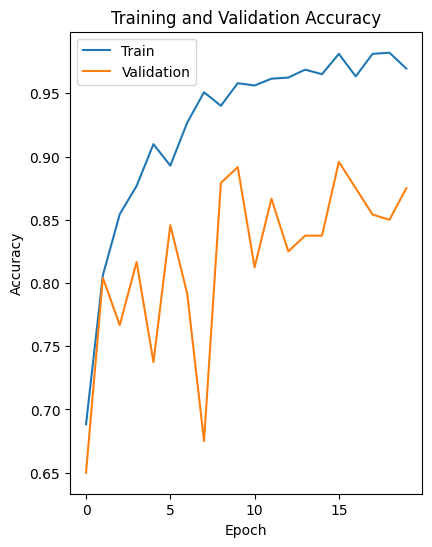

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()





<Figure size 1000x600 with 0 Axes>

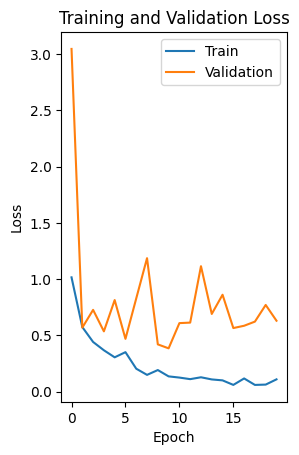

In [ ]:

plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Rest of your code)

# Evaluation
model.eval()

true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Test Accuracy: {accuracy*100:.4f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

NameError: ignored

<Axes: >

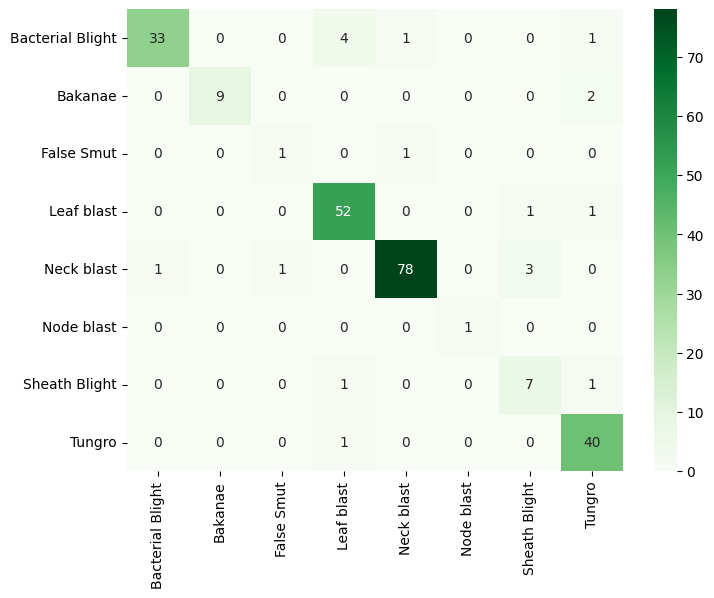

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=dataset.classes, yticklabels=dataset.classes)